In [45]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

#### Reading Data in

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


#### Data Exploration

In [5]:
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (891, 12)
test data shape: (418, 11)


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
full_df = pd.concat([train, test], axis = 0, ignore_index = True)
full_df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


In [9]:
full_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [10]:
full_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
# Most people come from Southampton so try fill the na with this value
full_df.Embarked=full_df.Embarked.fillna('S')

In [12]:
# Drop Cabin Column: Too much Nan
full_df.drop(['Cabin'], axis = 1, inplace = True)

In [13]:
# Fill the age column with the mean age
full_df.Age=full_df.Age.fillna(full_df.Age.mean())

In [14]:
full_df.dtypes

Age            float64
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [15]:
full_df.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [16]:
# Define target 
target= train.Survived
target.shape

(891,)

In [17]:
full_df=full_df[['Age','Embarked','Fare','Parch','Pclass','Sex','SibSp']]

In [18]:
# Define training data set
train_df=full_df[:891]

In [19]:
train_df.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,male,1
1,38.0,C,71.2833,0,1,female,1
2,26.0,S,7.9250,0,3,female,0


In [20]:
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
train_df['Embarked'] = train_df['Embarked'].map({'C':0,'Q':1,'S':2})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
train_df.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,2,7.2500,0,3,1,1
1,38.0,0,71.2833,0,1,0,1
2,26.0,2,7.9250,0,3,0,0


In [65]:
# optinal: Filter Age into five groups

In [24]:
def get_age(age):
      
    if (age<=12):
        return 0
    elif (12<age<=18):
        return 1
    elif (18<age<=30):
        return 2
    elif (30<age<=60):
        return 3
    elif (60<age):
        return 4
    

In [25]:
Age = train_df['Age']

In [26]:
train_df['Age']= np.array([get_age(x) for x in Age])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
# optinal: Filter Fare into groups

In [28]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [29]:
def get_fare(fare):
      
    if (fare<=8):
        return 0
    elif (8<fare<=14):
        return 1
    elif (14<fare<=31):
        return 2
    elif (31<fare):
        return 3
  

In [30]:
Fare=train_df.Fare

In [31]:
train_df['Fare']= np.array([get_fare(x) for x in Fare])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
train_df.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,2,2,0,0,3,1,1
1,3,0,3,0,1,0,1
2,2,2,0,0,3,0,0


In [33]:
x = train_df
y = train["Survived"]

#### Modeling

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=1)

In [35]:
print(x_train.shape,x_test.shape)

(712, 7) (179, 7)


#### Building the Model: 3 steps  Define, fit, predict

In [36]:
clf = DecisionTreeClassifier(random_state=2018)

In [37]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [38]:
predictions=clf.predict(x_test)

#### Evaluation

In [39]:
# ([TN,FN],[FP,TP])
confusion_matrix(y_test,predictions)

array([[92, 14],
       [28, 45]], dtype=int64)

In [40]:
accuracy_score(y_test,predictions)

0.76536312849162014

#### Tree Visulization

In [57]:
from sklearn.externals.six import StringIO
from IPython.display import Image

In [48]:
dot_data=StringIO()

In [51]:
tree.export_graphviz(clf, out_file=dot_data)

In [53]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

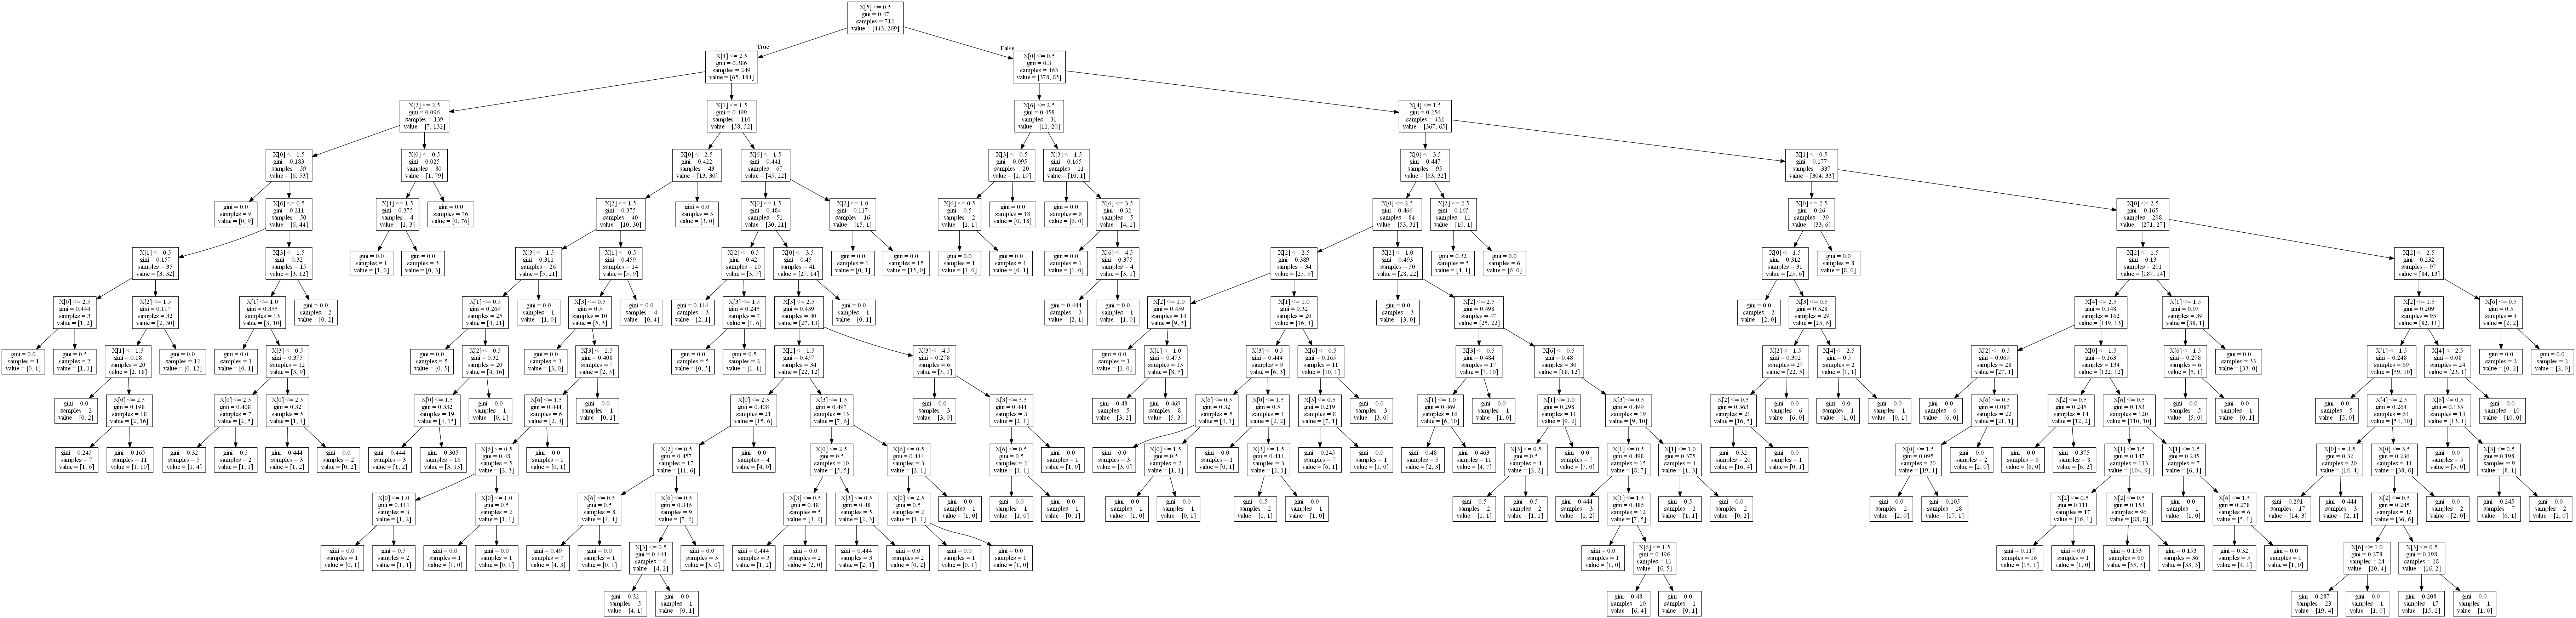

In [59]:
Image(graph.create_png())

#### Parameter Tuning

In [96]:
DecisionTreeClassifier?

In [92]:
clf_1=DecisionTreeClassifier(max_depth=5)

In [93]:
clf_1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
predictions_1=clf_1.predict(x_test)

In [95]:
accuracy_score(y_test,predictions_1)

0.77653631284916202

In [196]:
clf_2=DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.1)

In [197]:
clf_2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [198]:
predictions_2=clf_2.predict(x_test)

In [199]:
accuracy_score(y_test,predictions_2)

0.77653631284916202